In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, RidgeClassifierCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

%matplotlib inline

/Users/christophermanley/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df = pd.read_csv('./Data/model data 2.csv', index_col=0)
classes = pd.read_csv('./Data/NHL Rankings skinny 2008-2018 vertical.csv')

In [4]:
classes.drop(columns='Unnamed: 4', inplace=True)

In [5]:
df.rename(columns={'team_name': 'team'}, inplace=True)

In [6]:
pd.set_option('max_columns', 500)
pd.set_option('max_rows', 500)

In [7]:
full_df = pd.merge(df, classes, on=['team', 'year'])

In [8]:
full_df.drop(columns=['rank_y', 'cup_champs'], inplace=True)
full_df.rename(columns={'rank_x': 'rank'}, inplace=True)

In [9]:
full_df['ind'] = full_df['team'] + '_' + full_df['year'].astype(str)

full_df.set_index('ind', inplace=True)

full_df.head()

,games,goals,goals_against_ev,goals_ev,goals_pp,losses,opp_goals,opp_goals_pp,pdo,pen_kill_pct,points,points_pct,power_play_pct,save_pct,shot_pct,sos,srs,team,wins,year,rank,avg_corsi_pct,player_point_avg,avg_plus_minus,avg_ops,avg_dps,avg_ps,fenwick_pct,score_balance_pct,ev_goal_diff,special_teams_diff,gf_pg,ga_pg,class
ind,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Nashville Predators_2018,82.0,267.0,145.0,193.0,58.0,18.0,211.0,54.0,101.6,81.94,117.0,0.713,21.17,0.923,9.9,0.03,0.71,Nashville Predators,53.0,2018,5,49.660000,25.481481,9.185185,1.692593,1.700000,4.103704,49.836000,0.388889,48.0,4.0,3.256098,2.573171,4
Winnipeg Jets_2018,82.0,277.0,159.0,200.0,64.0,20.0,218.0,50.0,101.0,81.75,114.0,0.695,23.36,0.917,10.3,0.02,0.74,Winnipeg Jets,52.0,2018,3,51.061538,26.285714,7.250000,1.792857,1.567857,3.925000,51.357692,0.277778,41.0,14.0,3.378049,2.658537,3
Tampa Bay Lightning_2018,82.0,296.0,172.0,216.0,66.0,23.0,236.0,64.0,102.0,76.03,113.0,0.689,23.91,0.912,10.7,-0.07,0.66,Tampa Bay Lightning,54.0,2018,4,51.536000,28.962963,9.333333,2.103704,1.407407,4.085185,51.576000,0.388889,44.0,2.0,3.609756,2.878049,3
Boston Bruins_2018,82.0,270.0,161.0,197.0,61.0,20.0,214.0,40.0,100.2,83.67,112.0,0.683,23.64,0.912,9.9,-0.07,0.62,Boston Bruins,50.0,2018,7,53.162069,23.161290,5.419355,1.554839,1.509677,3.512903,53.320690,0.277778,36.0,21.0,3.292683,2.609756,4
Vegas Golden Knights_2018,82.0,272.0,182.0,218.0,53.0,24.0,228.0,44.0,100.5,81.43,109.0,0.665,21.37,0.911,10.1,-0.01,0.52,Vegas Golden Knights,51.0,2018,2,50.779167,26.000000,5.037037,1.788889,1.518519,3.807407,50.770833,0.277778,36.0,9.0,3.317073,2.780488,2


In [10]:
full_df.drop(columns=['losses', 'points', 'wins'], inplace=True)

In [11]:
X = full_df.drop(columns=['rank', 'team', 'class'])
y = full_df[['class', 'year']]

In [12]:
X_train = X[(X['year'] != 2010) & (X['year'] != 2018)].drop(columns='year')

X_test = X[X['year'].isin([2010, 2018])].drop(columns='year')

y_test = y[y['year'].isin([2010, 2018])].drop(columns='year')

y_train = y[(y['year'] != 2010) & (y['year'] != 2018)].drop(columns='year')

In [13]:
logreg = LogisticRegression(random_state=28, multi_class='multinomial', solver='lbfgs')
model = logreg.fit(X_train, y_train);

/Users/christophermanley/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
model.predict(X_train)
model.score(X_train, y_train)

0.6666666666666666

In [15]:
model.predict_proba(X_train)

array([[1.61625211e-01, 6.19101680e-02, 8.28205783e-02, 6.16389773e-01,
        7.72536022e-02, 6.67195659e-07],
       [1.42926695e-01, 1.47192544e-01, 1.55800911e-01, 2.62940646e-01,
        2.90072535e-01, 1.06666805e-03],
       [2.20044391e-02, 2.26181083e-02, 7.86449874e-02, 3.75347644e-01,
        4.95507359e-01, 5.87746281e-03],
       ...,
       [3.50126044e-09, 1.18161204e-07, 3.04467408e-06, 3.08376919e-06,
        2.03678019e-04, 9.99790072e-01],
       [3.86604956e-08, 5.19379749e-06, 3.68791336e-05, 8.56860185e-05,
        1.81155551e-03, 9.98060647e-01],
       [5.23819108e-09, 1.71169962e-06, 7.74596651e-06, 2.04589982e-05,
        7.10434175e-04, 9.99259644e-01]])

In [16]:
model.predict(X_test)
model.score(X_test, y_test)

0.6557377049180327

In [17]:
predictions = model.predict(X_test)

probs = model.predict_proba(X_test)

In [18]:
ind = pd.Series(y_test.index)
y_t = pd.Series(y_test['class'])
preds = pd.Series(predictions)

probs_df = pd.DataFrame(probs).round(decimals=3)

In [19]:
results = pd.DataFrame(data=[ind, y_t.values, preds]).T

results.rename(columns={'Unnamed 0': 'Actual Class', 'Unnamed 1': 'Predicted Class'}, inplace=True)

probs_max = pd.DataFrame(probs_df.max(axis=1))

In [20]:
results = pd.merge(results, probs_max, left_index=True, right_index=True)

results.rename(columns={0: 'Probability'}, inplace=True)

results

,ind,Actual Class,Predicted Class,Probability
0,Nashville Predators_2018,4,4,0.414
1,Winnipeg Jets_2018,3,4,0.425
2,Tampa Bay Lightning_2018,3,5,0.530
3,Boston Bruins_2018,4,5,0.340
4,Vegas Golden Knights_2018,2,4,0.526
5,Washington Capitals_2018,1,5,0.589
6,Toronto Maple Leafs_2018,5,5,0.496
7,Anaheim Ducks_2018,5,5,0.538
8,Minnesota Wild_2018,5,5,0.543
9,Pittsburgh Penguins_2018,4,5,0.655


#### Analysis

- While the accuracy score is obviously higher with just 6 classes, this model does a poor job of predicting accurately at the top. In the rare case that this model did predict a high class, it was wildly wrong. This model is not better than the original model that was run. 

In [21]:
probs_df.rename(columns={0: 'cup_champs', 1: 'cup_final', 2: 'conf_final', 3: '2nd_round', 4: '1st_round', 5: 'missed_playoffs'}, inplace=True)

In [22]:
probs_df['round_one_advance_%'] = 1 - (probs_df['1st_round'] + probs_df['missed_playoffs'])
probs_df['round_two_advance_%'] = 1 - (probs_df['2nd_round'] + probs_df['1st_round'] + probs_df['missed_playoffs'])
probs_df['win_conference_%'] = probs_df['cup_champs'] + probs_df['cup_final']
probs_df['win_cup_%'] = probs_df['cup_champs']

In [23]:
probs_df.drop(columns=['cup_champs', 'cup_final', 'conf_final', '2nd_round', '1st_round', 'missed_playoffs'], inplace=True)

In [24]:
odds_results = pd.merge(results, probs_df, left_index=True, right_index=True)

In [25]:
odds_2018 = odds_results[0:30]

In [26]:
playoff_odds_2018 = odds_2018[odds_2018['Actual Class'] < 6]

In [27]:
playoff_odds_2018

,ind,Actual Class,Predicted Class,Probability,round_one_advance_%,round_two_advance_%,win_conference_%,win_cup_%
0,Nashville Predators_2018,4,4,0.414,0.681,0.267,0.133,0.068
1,Winnipeg Jets_2018,3,4,0.425,0.656,0.231,0.132,0.026
2,Tampa Bay Lightning_2018,3,5,0.530,0.470,0.090,0.035,0.008
3,Boston Bruins_2018,4,5,0.340,0.659,0.337,0.237,0.030
4,Vegas Golden Knights_2018,2,4,0.526,0.614,0.088,0.045,0.004
5,Washington Capitals_2018,1,5,0.589,0.346,0.060,0.018,0.001
6,Toronto Maple Leafs_2018,5,5,0.496,0.500,0.079,0.045,0.001
7,Anaheim Ducks_2018,5,5,0.538,0.380,0.102,0.027,0.007
8,Minnesota Wild_2018,5,5,0.543,0.381,0.062,0.017,0.001
9,Pittsburgh Penguins_2018,4,5,0.655,0.236,0.047,0.023,0.000


In [28]:
playoff_odds_2018.rename(columns={'ind': 'team'}, inplace=True)

/Users/christophermanley/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


#### Vegas Odds source

source: https://www.cbssports.com/nhl/news/nhl-playoff-odds-2018-simulation-forecasts-teams-with-best-odds-of-winning-stanley-cup/

In [29]:
vegas = pd.read_csv('./Data/NHL Vegas Odds 2018 clean.csv')

In [30]:
vegas

,team,vegas_round_one_advance_%,vegas_round_two_advance_%,vegas_win_conference_%,vegas_win_cup_%
0,Tampa Bay Lightning_2018,0.948,0.618,0.308,0.167
1,Washington Capitals_2018,0.731,0.395,0.125,0.067
2,Pittsburgh Penguins_2018,0.915,0.517,0.263,0.143
3,Boston Bruins_2018,0.594,0.215,0.182,0.100
4,Toronto Maple Leafs_2018,0.406,0.125,0.125,0.067
5,Philadelphia Flyers_2018,0.086,0.020,0.048,0.024
6,Columbus Blue Jackets_2018,0.269,0.069,0.091,0.048
7,New Jersey Devils_2018,0.052,0.015,0.048,0.024
8,Nashville Predators_2018,0.937,0.571,0.364,0.200
9,Vegas Golden Knights_2018,0.785,0.549,0.182,0.091


In [31]:
model_vs_vegas = pd.merge(playoff_odds_2018, vegas, on='team')

In [32]:
model_vs_vegas.drop(columns=['Actual Class', 'Predicted Class', 'Probability'], inplace=True)

In [33]:
model_vs_vegas.sort_values(by='win_cup_%', ascending=False)

,team,round_one_advance_%,round_two_advance_%,win_conference_%,win_cup_%,vegas_round_one_advance_%,vegas_round_two_advance_%,vegas_win_conference_%,vegas_win_cup_%
0,Nashville Predators_2018,0.681,0.267,0.133,0.068,0.937,0.571,0.364,0.200
3,Boston Bruins_2018,0.659,0.337,0.237,0.030,0.594,0.215,0.182,0.100
1,Winnipeg Jets_2018,0.656,0.231,0.132,0.026,0.540,0.252,0.200,0.111
12,Los Angeles Kings_2018,0.689,0.142,0.070,0.010,0.216,0.088,0.100,0.048
2,Tampa Bay Lightning_2018,0.470,0.090,0.035,0.008,0.948,0.618,0.308,0.167
7,Anaheim Ducks_2018,0.380,0.102,0.027,0.007,0.456,0.158,0.111,0.059
4,Vegas Golden Knights_2018,0.614,0.088,0.045,0.004,0.785,0.549,0.182,0.091
13,Columbus Blue Jackets_2018,0.183,0.046,0.010,0.003,0.269,0.069,0.091,0.048
5,Washington Capitals_2018,0.346,0.060,0.018,0.001,0.731,0.395,0.125,0.067
6,Toronto Maple Leafs_2018,0.500,0.079,0.045,0.001,0.406,0.125,0.125,0.067


In [34]:
model_vs_vegas1 = model_vs_vegas.drop(columns=['vegas_win_conference_%','vegas_win_cup_%', 
                                               'win_conference_%', 'win_cup_%',
                                               'round_two_advance_%', 'vegas_round_two_advance_%']).sort_values(by='vegas_round_one_advance_%', ascending=False)

model_vs_vegas2 = model_vs_vegas.drop(columns=['round_one_advance_%', 'win_conference_%',
                                               'vegas_round_one_advance_%', 'vegas_win_conference_%', 
                                               'win_cup_%', 'vegas_win_cup_%']).sort_values(by='vegas_round_two_advance_%', ascending=False)

model_vs_vegas3 = model_vs_vegas.drop(columns=['round_one_advance_%', 'vegas_round_one_advance_%',
                                               'round_two_advance_%', 'vegas_round_two_advance_%',
                                               'win_cup_%', 'vegas_win_cup_%']).sort_values(by='vegas_win_conference_%', ascending=False)

model_vs_vegas4 = model_vs_vegas.drop(columns=['round_one_advance_%', 'vegas_round_one_advance_%',
                                               'round_two_advance_%', 'vegas_round_two_advance_%',
                                               'win_conference_%', 'vegas_win_conference_%']).sort_values(by='vegas_win_cup_%', ascending=False)

In [35]:
df1 = model_vs_vegas1.melt(id_vars=['team'])
df2 = model_vs_vegas2.melt(id_vars=['team'])
df3 = model_vs_vegas3.melt(id_vars=['team'])
df4 = model_vs_vegas4.melt(id_vars=['team'])

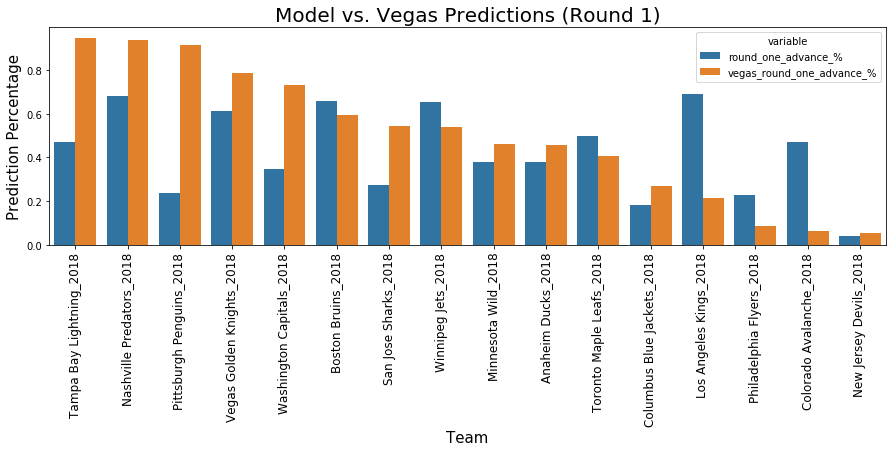

In [36]:
plt.figure(figsize=(15, 4))
sns.barplot(x='team', y='value', hue='variable', data=df1)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Team', fontsize=15)
plt.ylabel('Prediction Percentage', fontsize=15)
plt.title('Model vs. Vegas Predictions (Round 1)', fontsize=20);

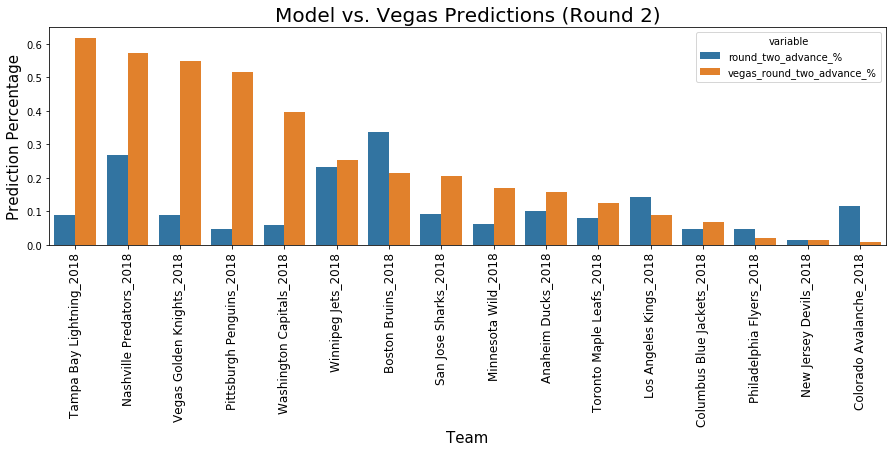

In [37]:
plt.figure(figsize=(15, 4))
sns.barplot(x='team', y='value', hue='variable', data=df2)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Team', fontsize=15)
plt.ylabel('Prediction Percentage', fontsize=15)
plt.title('Model vs. Vegas Predictions (Round 2)', fontsize=20);

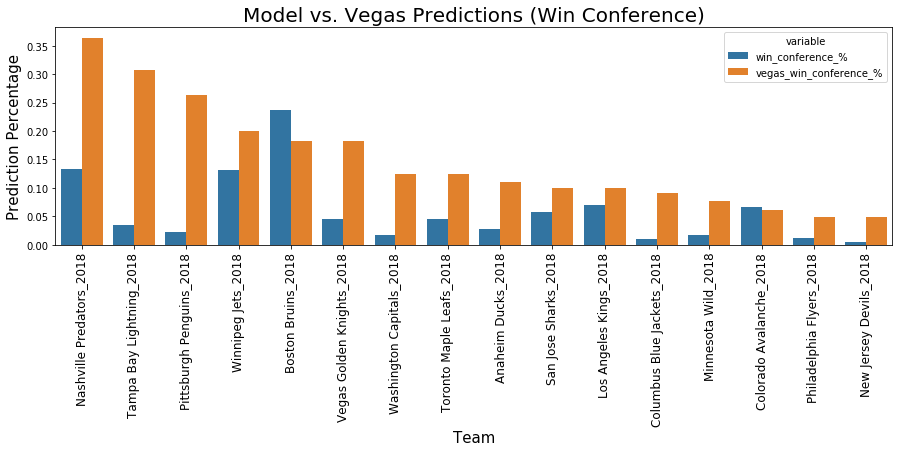

In [40]:
plt.figure(figsize=(15, 4))
sns.barplot(x='team', y='value', hue='variable', data=df3)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Team', fontsize=15)
plt.ylabel('Prediction Percentage', fontsize=15)
plt.title('Model vs. Vegas Predictions (Win Conference)', fontsize=20);

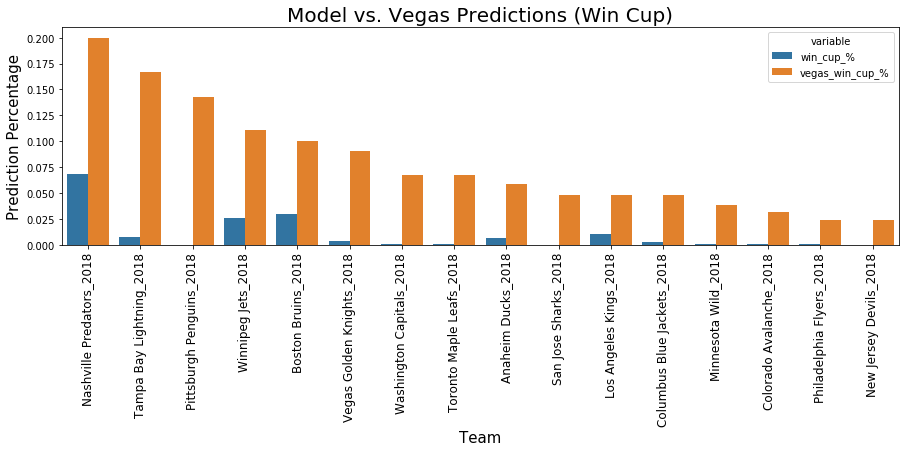

In [41]:
plt.figure(figsize=(15, 4))
sns.barplot(x='team', y='value', hue='variable', data=df4)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Team', fontsize=15)
plt.ylabel('Prediction Percentage', fontsize=15)
plt.title('Model vs. Vegas Predictions (Win Cup)', fontsize=20);